In [1]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

In [12]:
df = pd.read_csv('../data/FinalNew.csv')


1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.


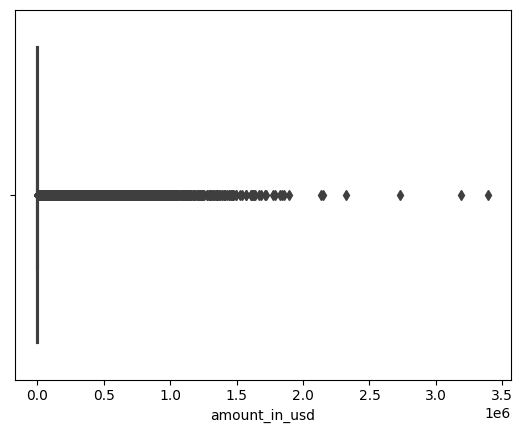

In [13]:
sns.boxplot(x=df['amount_in_usd'])
median = df['amount_in_usd'].median()
df['amount_in_usd'] = df['amount_in_usd'].mask(df['amount_in_usd'] > 2000000, median)


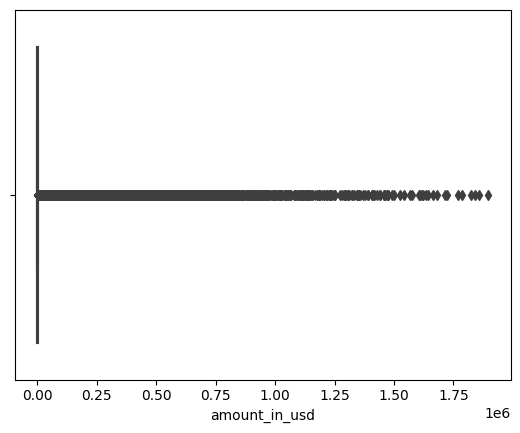

In [4]:
sns.boxplot(x=df['amount_in_usd'])
plt.show()

2. Label encoding or One hot Encoding on all the categorical columns


In [5]:
categorical = []
continuous = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        continuous.append(col)

In [15]:
le = LabelEncoder()
# oneHot = OneHotEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col])
    # df[col] = oneHot.fit_transform(df[col])

3. Log Transformations on continuous columns


In [16]:
for col in continuous:
    df[col] = df[col].apply(lambda x: np.log(x))

4. Try to extract new features by grouping existing columns


In [27]:
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']

grouped_df

,SALES_ORG,avg_order_amount,total_credit_value,unique_customers,max_amount_usd
0,7.649693,NaN,609429,141,12.915910
1,7.650169,NaN,723167,129,11.876058
2,7.650645,NaN,594668,116,12.157586
3,7.651120,NaN,667986,124,11.312470
4,7.651596,NaN,806552,137,12.091408
...,...,...,...,...,...
2406,8.413165,NaN,613023,143,13.351494
2407,8.413387,NaN,620833,122,11.434042
2408,8.413609,NaN,775251,139,12.895616
2409,8.413831,NaN,487248,146,12.903740


5. Create a heatmap to find correlation between the columns


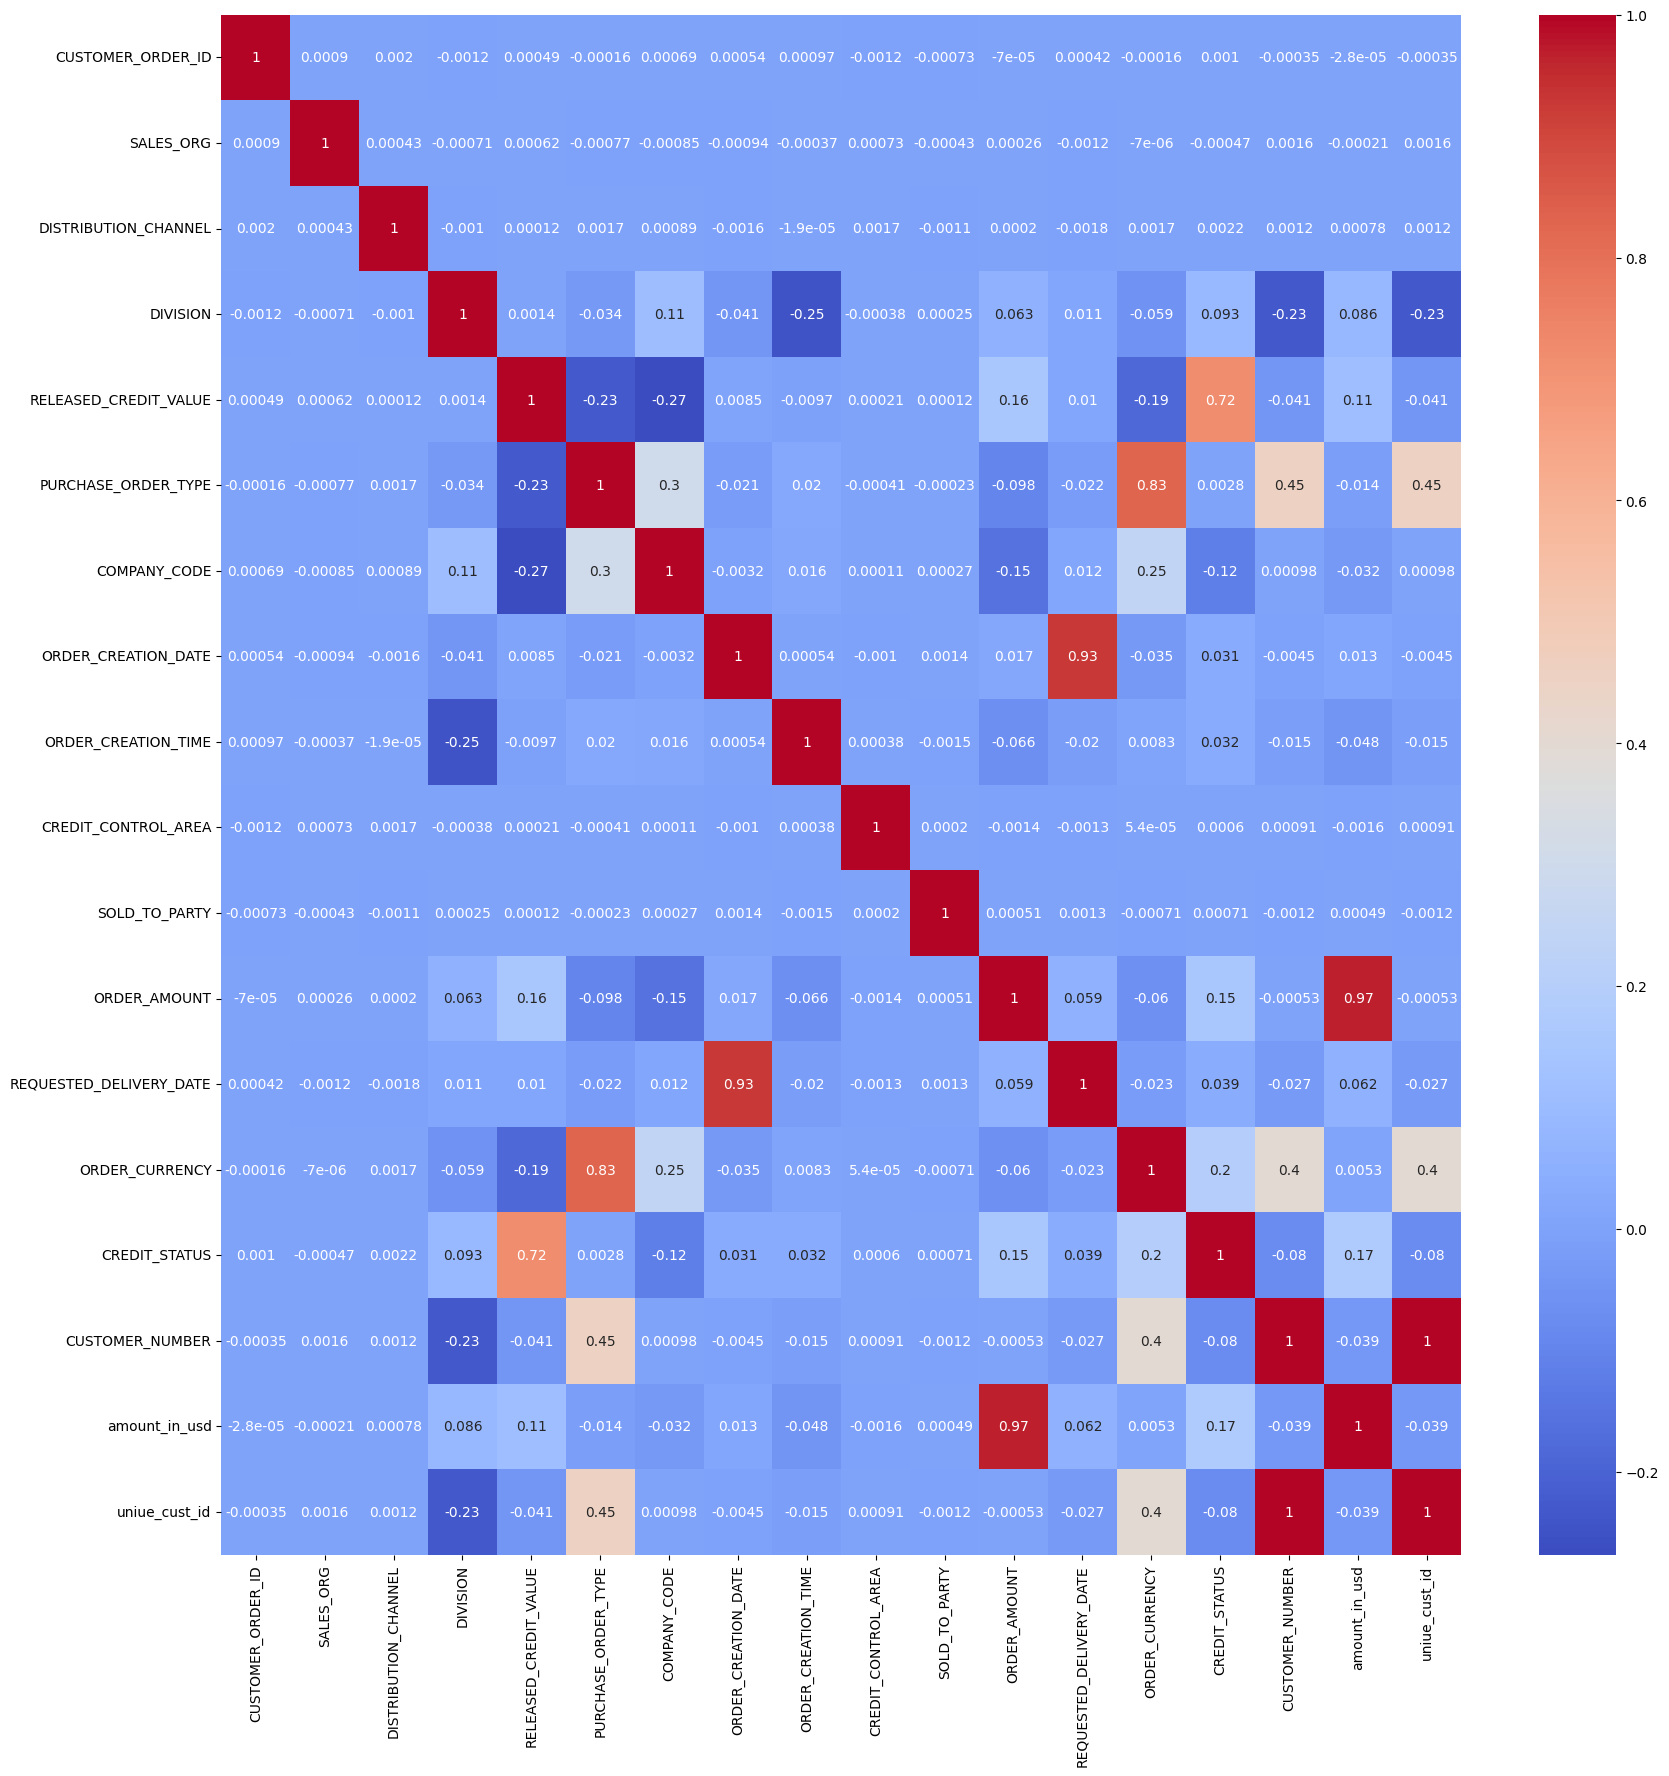

In [28]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

6. Try to identify important or relevant columns for feature extraction

In [29]:
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE'), ('ORDER_AMOUNT', 'amount_in_usd'), ('CUSTOMER_NUMBER', 'uniue_cust_id')]
